# Aarki_Analytics_Challenge

# Table of Contents <a id="top"></a>

- [1. Data Dictionary](#data-dictionary)  
- [2. Cleaning Data](#cleaning-data)  
- [3. Data Analysis](#data-analysis)  
  - [a) Question 1](#question-1)  
  - [b) Question 2](#question-2)  
  - [c) Question 3](#question-3)  

---

## 1. Data Dictionary <a id="data-dictionary"></a>


- **'LeadCreated'** – Lead created date
- **'FirstName'** – First name (you likely won't use this)
- **'Email'** – Email
- **'VendorLeadID'** – VendorLeadID (you won't use this, but it's our unique key, good for counting in pivot tables)
- **'CallStatus'** – CallStatus. Every lead can only have one status. There are 4 groups of leads:
    1. **Closed** – Became a customer (this is the Advertiser's ultimate measure of success; the "best" quality lead by a longshot)
    2. **EP Sent** – The first step in becoming a customer is to have an EP worksheet sent via email. If a person doesn't return the worksheet, they can stay in this status forever.
    3. **EP Received** – The second step is when the customer returns the worksheet.
    4. **EP Confirmed** – The third step is for the Advertiser to confirm the accuracy of the information in the worksheet.
    5. **Unable to Contact** – Noncontactable phone number (e.g., fax line, disconnected line).
    6. **Contacted - Invalid Profile** – Advertiser called the number, but the person who answered was not the one from the lead info (e.g., wrong number, or the phone was connected to Joe's Pizza shop).
    7. **Contacted - Doesn't Qualify** – Advertiser talked to the right person but they did not have enough debt or income to qualify for a program.
    8. **Unknown** – Leads that are neither bad nor good (e.g., the person is not interested after learning about the program).
  
- **'WidgetName'** – WidgetName. This is our internal name for the FormAd creative. Example: `w-302252-DebtReduction1-1DC-yellowarrow-blue`. Breakdown:
    - **302252**: Ad size (302x252).
    - **DebtReduction1**: Fieldset (set of questions asked).
    - **1DC**: All questions were on one form page.
    - **yellowarrow**: Design name.
    - **blue**: Background color.
    - Note: 300250 and 302252 widgets are identical.
  
- **'PublisherZoneName'** – PublisherZoneName. Refers to location on the page (we have maybe 50 zones in our network, but only 2 are used here).
  
- **'PublisherCampaignName'** – PublisherCampaignName. Example: "DebtReductionInc Call Center" refers to leads created by people calling an 800# and entering the information via the call center staff; DebtReductionInc refers to leads filled out online.

- **'AddressScore'** – AddressScore. This is based on checking the name and address against an offline database. 
    - **5**: Perfect match.
    - **4 & 3**: Close match.
    - **2 & 1**: Mismatch.

- **'PhoneScore'** – PhoneScore. Similar to AddressScore, based on checking the name and address against an offline database.
    - **5**: Perfect match.
    - **4 & 3**: Close match.
    - **2 & 1**: Mismatch.

- **'AdvertiserCampaignName'** – AdvertiserCampaignName. 
    - Example: **creditsolutions-branded-shortform** indicates consumers saw the Advertiser's logo; **Debt Settlement1 Master** means the form was generic without the advertiser's name.

- **'State'** – State where the consumer lives.
  
- **'DebtLevel'** – Debt level. The amount of debt the consumer has.
  
- **'IP Address'** – IP Address (this is deleted, but there are ways to resolve these to home/work locations).
  
- **'Partner'** – Partner company responsible for running ads on platforms like Google, Yahoo, AdKnowledge, etc.
  
- **'ReferralDomain'** – Referral domain. URL of the domain that drove the traffic to the website where the test ads ran.

- **'MarketingCampaign'** – Google AdWords or Yahoo Search Marketing campaign name. If it says "content," it isn't search traffic but AdSense traffic from Google's content network.
  
- **'AdGroup'** – Google AdWords or Yahoo Search Marketing AdGroup.

- **'Keyword'** – Google AdWords or Yahoo Search Marketing Keyword.

- **'SearchQuery'** – Referring Keyword String. The actual keyword string typed in by the user (if applicable).

- **'ReferralURL'** – Referral URL.

- **'ReferralURL Parameters'** – Referral URL parameters. Additional strings after the referral URL.

- **'LandingPageURL'** – Landing Page URL (the page where the ad was shown).
  
- **'Landing Page URL Parameters'** – Landing Page URL parameters. Additional strings after the landing page URL, mostly already parsed into columns like 'ReferralDomain' and 'SearchQuery'.


## 2. Cleaning Data <a id="cleaning-data"></a>

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the excel
df=pd.read_excel("Analyst case study dataset 1.xls")
# To display all columns
pd.set_option('display.max_columns', None)
df.head(10)

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,State,DebtLevel,IP Address,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,creditsolutions-branded-shortform,HI,30001-50000,NaN,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,AL,90000-100000,NaN,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,NY,20001-30000,NaN,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,WA,20001-30000,NaN,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,TX,More_than_100000,NaN,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
5,2009-07-29 14:50:06.657,diana,diana.powers@tirecenters.com,94AB0C2C-0DEA-4B5D-96FA-94AE6C470CA0,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,CO,10001-15000,NaN,Google,googleads.g.doubleclick.net,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-9336631000664321&dt=124889666347...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
6,2009-07-06 11:50:41.210,kyla,kmcmillion@live.com,26583F6E-49B5-47B8-96E1-A321CAF09B7A,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,4.0,Debt Settlement1 Master,MI,70001-90000,NaN,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-4461215404735941&dt=124689889799...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
7,2009-04-22 16:41:49.000,John,johndoe333@yahoo.com,hxFrkNSCjU6rE2u-7yH-KQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,IA,7500-15000,NaN,google,www.google.com,Credit,Debt Credit Services,Credit services,credit services,http://www.google.com/search,q=credit services&rls=com.microsoft:*&ie=UTF-8...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=D...
8,2009-05-05 07

In [3]:
#Checking the number of rows and columns
df.shape

(3021, 24)

There are 3021 leads and 24 columns.

In [4]:
# Checking the summary info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadCreated                  3021 non-null   datetime64[ns]
 1   FirstName                    3021 non-null   object        
 2   Email                        3021 non-null   object        
 3   VendorLeadID                 3013 non-null   object        
 4   CallStatus                   881 non-null    object        
 5   WidgetName                   3021 non-null   object        
 6   PublisherZoneName            3021 non-null   object        
 7   PublisherCampaignName        3021 non-null   object        
 8   AddressScore                 1171 non-null   float64       
 9   PhoneScore                   1393 non-null   float64       
 10  AdvertiserCampaignName       3021 non-null   object        
 11  State                        3021 non-null 

Columns CallStatus,AddressScore, PhoneScore, IP Address, ReferralDomain, MarketingCampaign, AdGroup, Keyword, SearchQuery, ReferralURL, ReferralURL Parameters have NULL values.

Since there are no values in IP Address dropping the column.

In [5]:
#Deleting the IP Address column
df = df.drop('IP Address', axis=1)

The VendorLeadID is mostly for counting and would not be relevant for analysis, hence dropping the column.

In [6]:
#Deleting the VendorLeadID column
df = df.drop('VendorLeadID', axis=1)

In [7]:
# Ssummary statistics
df.describe()

,AddressScore,PhoneScore
count,1171.000000,1393.000000
mean,4.286080,3.903087
std,1.345192,1.101826
min,1.000000,1.000000
25%,4.000000,3.000000
50%,5.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [8]:
#Checking if there are any duplicated rows
duplicates = df[df.duplicated()]
duplicates

,LeadCreated,FirstName,Email,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,State,DebtLevel,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters


No duplicate records found.

In [9]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                       0
FirstName                         0
Email                             0
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


In [10]:
# Checking missing values percentage
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

CallStatus                70.837471
Keyword                   67.593512
AddressScore              61.238001
SearchQuery               58.126448
PhoneScore                53.889441
ReferralURL Parameters    24.428997
ReferralDomain            17.047335
ReferralURL               17.047335
MarketingCampaign          9.003641
AdGroup                    9.003641
dtype: float64


Let us deal with null values,starting with CallStatus which is one of the most important columns.

In [11]:
df["CallStatus"].value_counts(dropna=False)

NaN                                            2140
Closed                                          245
Contacted - Doesn't Qualify                     212
Unable to contact - Bad Contact Information     191
EP Confirmed                                    130
Contacted - Invalid Profile                      85
EP Sent                                          16
EP Received                                       2
Name: CallStatus, dtype: int64

I am imputing the missing CallStatus values with 'Unknown' because the existing data classification already considers leads that do not clearly fall into 'good' or 'bad' categories as 'Unknown,' such as leads where the person is not interested or did not return communication. This approach maintains consistency with the established definitions and avoids making assumptions about the nature of the missing data.

In [12]:
df['CallStatus'].fillna('Unknown', inplace=True)
# Checking if missing values have been imputed
print(df['CallStatus'].isnull().sum())

0


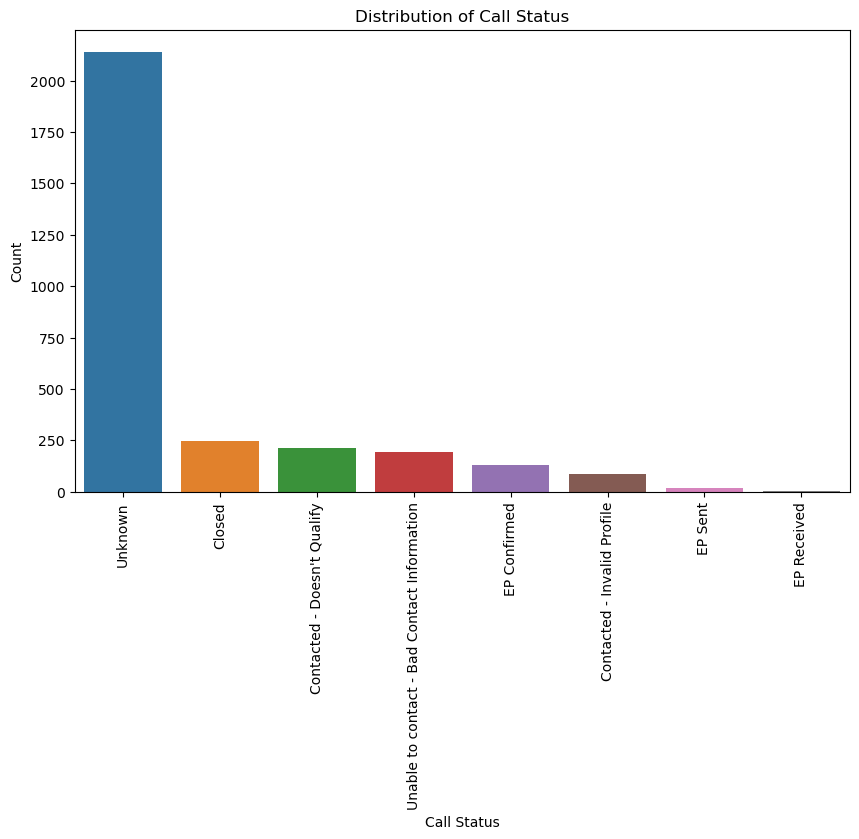

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CallStatus', order=df['CallStatus'].value_counts().index)
plt.title('Distribution of Call Status')
plt.xlabel('Call Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The bar chart showing the distribution of Call Status reveals that the majority of calls fall under the "Unknown" category, with 2140 instances, suggesting a significant number of cases where they talked to Advertiser but not interested after learning about the pros and cons of their program, person did not return voice mail, etc. Not a bad lead or a good lead . Following this, there are smaller but notable groups such as "Closed" and "Contacted - Doesn't Qualify" , these statuses are also relatively common.

Other statuses like "Unable to contact - Bad Contact Information"  and "EP Confirmed"occur in even fewer cases, signaling potential issues in contacting leads or confirming appointments.

The least frequent statuses, including "EP Sent" and "EP Received", represent specialized or less common outcomes, which might indicate a narrower scope of events or stages in the lead management process.

In [14]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                       0
FirstName                         0
Email                             0
CallStatus                        0
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


In [15]:
df["AddressScore"].value_counts(dropna=False)

NaN    1850
5.0     870
1.0     122
3.0      93
4.0      48
2.0      38
Name: AddressScore, dtype: int64

In [16]:
df["PhoneScore"].value_counts(dropna=False)

NaN    1628
5.0     619
3.0     427
4.0     184
2.0     162
1.0       1
Name: PhoneScore, dtype: int64

In [17]:
# Converting LeadCreated to datetime
df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])
# Creating missingness indicators
missingness_df = df[['AddressScore', 'PhoneScore']].isna().astype(int)
missingness_df.index = df['LeadCreated']
# Aggregating by week and month
df_weekly = missingness_df.resample('W').mean() * 100
df_monthly = missingness_df.resample('M').mean() * 100
print("Weekly Missingness Trend:\n", df_weekly)
print("Monthly Missingness Trend:\n", df_monthly)

Weekly Missingness Trend:
              AddressScore  PhoneScore
LeadCreated                          
2009-04-05     100.000000  100.000000
2009-04-12     100.000000  100.000000
2009-04-19     100.000000  100.000000
2009-04-26     100.000000  100.000000
2009-05-03     100.000000  100.000000
2009-05-10     100.000000  100.000000
2009-05-17     100.000000  100.000000
2009-05-24     100.000000  100.000000
2009-05-31     100.000000  100.000000
2009-06-07     100.000000  100.000000
2009-06-14     100.000000  100.000000
2009-06-21     100.000000  100.000000
2009-06-28     100.000000   53.271028
2009-07-05     100.000000    1.980198
2009-07-12      72.115385    1.923077
2009-07-19       6.086957    6.086957
2009-07-26       0.000000    0.000000
2009-08-02       0.000000    0.000000
2009-08-09       1.052632    1.052632
2009-08-16       0.000000    0.000000
2009-08-23       0.000000    0.000000
2009-08-30       1.123596    1.123596
2009-09-06       1.351351    1.351351
2009-09-13       1.5384

Points to note:

**AddressScore and PhoneScore Are Systematically Missing Early On**
- April 2009 to mid-June 2009: 100% missing for both AddressScore and PhoneScore.This confirms that these fields were not collected initially.
- Late June 2009: PhoneScore starts appearing, but AddressScore is still missing for most cases.
- Early July 2009: Missingness drops dramatically, suggesting both fields were introduced into the dataset.
- Late July 2009 onwards: Missingness stabilizes at near-zero levels, meaning the data is fully available.

**Conclusion:**

The missingness is due to data availability over time, meaning it's systematic i.e. Missing Not At Random - MNAR.
Since it was missing before a specific time, creating a "Missing" category is appropriate. Mode imputation would not make sense, as early records never had these fields collected at all.

If missing values are treated as "Missing" rather than imputing them with the mode, we can also understand how missing data might correlate with lead quality trends over time, could offer insights into lead quality and how lead quality is influenced by specific data points, including any missing information.

In [18]:
# Filling missing values with '-1' 
df['AddressScore'] = df['AddressScore'].fillna('-1')
df['PhoneScore'] = df['PhoneScore'].fillna('-1')

In [19]:
# Changing the column type to object
df['AddressScore'] = df['AddressScore'].astype('object')
df['PhoneScore'] = df['PhoneScore'].astype('object')
print(df['AddressScore'].dtype)
print(df['PhoneScore'].dtype)

object
object


In [20]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                       0
FirstName                         0
Email                             0
CallStatus                        0
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                      0
PhoneScore                        0
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


In [21]:
df["AddressScore"].value_counts(dropna=False)

-1     1850
5.0     870
1.0     122
3.0      93
4.0      48
2.0      38
Name: AddressScore, dtype: int64

In [22]:
df["PhoneScore"].value_counts(dropna=False)

-1     1628
5.0     619
3.0     427
4.0     184
2.0     162
1.0       1
Name: PhoneScore, dtype: int64

In [23]:
# Checking if both ReferralDomain and ReferralURL are missing at the same time
missing_both = df[df['ReferralDomain'].isnull() & df['ReferralURL'].isnull()]
print(f"Rows where both ReferralDomain and ReferralURL are missing: {missing_both.shape[0]}")

Rows where both ReferralDomain and ReferralURL are missing: 515


In [24]:
df['PublisherCampaignName'].value_counts()

DebtReductionInc           2750
DebtReductionCallCenter     271
Name: PublisherCampaignName, dtype: int64

In [25]:
df[df["ReferralDomain"].isna()]["PublisherCampaignName"].value_counts(dropna=False)

DebtReductionCallCenter    271
DebtReductionInc           244
Name: PublisherCampaignName, dtype: int64

In [26]:
columns_to_check = ['ReferralDomain', 'MarketingCampaign', 'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL', 'ReferralURL Parameters']
for i in columns_to_check:
    print(i)
    print(df[df[i].isna()]["PublisherCampaignName"].value_counts(dropna=False))
    print("--------")

ReferralDomain
DebtReductionCallCenter    271
DebtReductionInc           244
Name: PublisherCampaignName, dtype: int64
--------
MarketingCampaign
DebtReductionCallCenter    271
DebtReductionInc             1
Name: PublisherCampaignName, dtype: int64
--------
AdGroup
DebtReductionCallCenter    271
DebtReductionInc             1
Name: PublisherCampaignName, dtype: int64
--------
Keyword
DebtReductionInc           1771
DebtReductionCallCenter     271
Name: PublisherCampaignName, dtype: int64
--------
SearchQuery
DebtReductionInc           1485
DebtReductionCallCenter     271
Name: PublisherCampaignName, dtype: int64
--------
ReferralURL
DebtReductionCallCenter    271
DebtReductionInc           244
Name: PublisherCampaignName, dtype: int64
--------
ReferralURL Parameters
DebtReductionInc           467
DebtReductionCallCenter    271
Name: PublisherCampaignName, dtype: int64
--------


For "DebtReductionCallCenter", the columns 'ReferralDomain', 'MarketingCampaign', 'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL', 'ReferralURL Parameters' are missing, especially if these are leads coming from a call center (via an 800 number) where the information is manually entered by the call center staff rather than automatically captured through online tracking.

Imputing those Null values with a different category to show they are from the call center.

In [27]:
# Values to impute for each column
impute_values = {
    'ReferralDomain': 'No ReferralDomain - Call Center',
    'MarketingCampaign': 'No MarketingCampaign - Call Center',
    'AdGroup': 'No AdGroup - Call Center',
    'Keyword': 'No Keyword - Call Center',
    'SearchQuery': 'No SearchQuery - Call Center',
    'ReferralURL': 'No ReferralURL - Call Center',
    'ReferralURL Parameters': 'No ReferralURL Parameters - Call Center'
}


# The rows where 'PublisherCampaignName' is 'DebtReductionIncCallCenter'
debt_reduction_rows = df['PublisherCampaignName'] == 'DebtReductionCallCenter'

# Replacing the missing values based on the 'PublisherCampaignName' condition
for column, value in impute_values.items():
    # Using loc to fill missing values only in the relevant rows and columns
    df.loc[debt_reduction_rows, column] = df.loc[debt_reduction_rows, column].fillna(value)

In [28]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                       0
FirstName                         0
Email                             0
CallStatus                        0
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                      0
PhoneScore                        0
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
Partner                           0
ReferralDomain                  244
MarketingCampaign                 1
AdGroup                           1
Keyword                        1771
SearchQuery                    1485
ReferralURL                     244
ReferralURL Parameters          467
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64


If a Keyword or SearchQuery is missing, it likely means no keyword was used maybe direct traffic or an unspecified query.
Using the mode could incorrectly associate missing data with the most common keyword/query, which may introduce bias.

In [29]:
#Keyword & Search Query Imputation 
df["Keyword"] = df["Keyword"].fillna("NoKeyword")
df["SearchQuery"] = df["SearchQuery"].fillna("NoSearchQuery")

In [30]:
value_counts = df['ReferralDomain'].value_counts()
print(value_counts)

search.yahoo.com                   573
www.google.com                     491
googleads.g.doubleclick.net        290
No ReferralDomain - Call Center    271
ezinearticles.com                  101
                                  ... 
wwk.searchresults.gci.net            1
www.ezcreditrepair.com               1
www.profileonline.com                1
www.dontpayitback.com                1
www.reducethedebt.org                1
Name: ReferralDomain, Length: 373, dtype: int64


In [31]:
value_counts = df['ReferralURL'].value_counts()
print(value_counts)

http://www.google.com/search                                    453
http://search.yahoo.com/search                                  443
http://googleads.g.doubleclick.net/pagead/ads                   290
No ReferralURL - Call Center                                    271
http://ezinearticles.com/                                        89
                                                               ... 
http://www.consolidationcompanies.com/                            1
http://by120w.bay120.mail.live.com/mail/InboxLight.aspx           1
http://us.mc462.mail.yahoo.com/mc/welcome                         1
http://search.yahoo.com/search;_ylt=A0oGkxZv3.NJxGQAWrtXNyoA      1
http://search.yahoo.com/search;_ylt=A0geu4teHtZJulsA0DJXNyoA      1
Name: ReferralURL, Length: 671, dtype: int64


In [32]:
# Calculating weekly and monthly missingness for ReferralDomain
columns_to_check = ['ReferralDomain']
for col in columns_to_check:
    print(f"\nMissingness Trend for {col} (Weekly):")
    print(df.groupby(pd.Grouper(key='LeadCreated', freq='W'))[col].apply(lambda x: x.isna().mean() * 100))
    print(f"\nMissingness Trend for {col} (Monthly):")
    print(df.groupby(pd.Grouper(key='LeadCreated', freq='M'))[col].apply(lambda x: x.isna().mean() * 100))


Missingness Trend for ReferralDomain (Weekly):
LeadCreated
2009-04-05    16.216216
2009-04-12     3.361345
2009-04-19     4.800000
2009-04-26     9.677419
2009-05-03     4.651163
2009-05-10     4.424779
2009-05-17    12.048193
2009-05-24     5.737705
2009-05-31     9.848485
2009-06-07     7.299270
2009-06-14     7.878788
2009-06-21     6.535948
2009-06-28     7.476636
2009-07-05    15.841584
2009-07-12    11.538462
2009-07-19     7.826087
2009-07-26    11.805556
2009-08-02     9.558824
2009-08-09     3.157895
2009-08-16     7.758621
2009-08-23     4.807692
2009-08-30    14.606742
2009-09-06    10.810811
2009-09-13     6.153846
2009-09-20     5.263158
2009-09-27     7.317073
2009-10-04     2.439024
Freq: W-SUN, Name: ReferralDomain, dtype: float64

Missingness Trend for ReferralDomain (Monthly):
LeadCreated
2009-04-30     6.370656
2009-05-31     8.448276
2009-06-30     7.717570
2009-07-31    11.090226
2009-08-31     7.534247
2009-09-30     6.686047
Freq: M, Name: ReferralDomain, dtype:

The missingness is erratic in terms of time period.

In [33]:
categorical_columns = [
    'WidgetName','AdvertiserCampaignName','MarketingCampaign', 'AdGroup','Partner','CallStatus','PublisherZoneName','PublisherCampaignName','AddressScore',
'PhoneScore','LandingPageURL','State','DebtLevel']

for col in categorical_columns:
    print(f"Missingness by {col}:")
    print(df.groupby(col)['ReferralDomain'].apply(lambda x: x.isna().mean()))
    print("\n" + "="*50 + "\n")

Missingness by WidgetName:
WidgetName
w-300250-DebtReduction1-1DC                     0.017241
w-300250-DebtReduction1-1DC-BlueMeter           0.065217
w-300250-DebtReduction1-1DC-CreditSolutions     0.064935
w-300250-DebtReduction1-1DC-Head2               0.078652
w-300250-DebtReduction1-1DC-Head3               0.013333
w-300250-DebtReduction1-1DC-white               0.333333
w-300250-DebtReduction1-2DC-BlueMeter           0.045977
w-300250-DebtReduction1-2DC-CreditSolutions     0.106667
w-302252-DebtReduction1-1DC                     0.121324
w-302252-DebtReduction1-1DC-CreditSolutions     0.098672
w-302252-DebtReduction1-1DC-white               0.074419
w-302252-DebtReduction1-1DC-yellowarrow         0.142857
w-302252-DebtReduction1-1DC-yellowarrow-blue    0.081897
w-302252-DebtReduction1-1DC-yellowarrow-dark    0.074074
Name: ReferralDomain, dtype: float64


Missingness by AdvertiserCampaignName:
AdvertiserCampaignName
Debt Settlement1 Master              0.069972
creditsolutions-b

Based on the output,  while there are some variables with higher missingness for certain categories, there doesn't seem to be a consistent pattern or correlation between the missingness of ReferralDomain and any specific categorical variable. Missingness seems to vary quite a bit, and it's likely random rather than systematic.


Also checking the statistical significance of CallStatus and Referral Domain.

In [34]:
import scipy.stats as stats
# Contingency table of CallStatus and ReferralDomain
contingency_table = pd.crosstab(df['CallStatus'], df['ReferralDomain'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)

Chi-squared statistic: 2342.949260216077
p-value: 0.9999067021020568


The high p-value indicates that there is no significant statistical relationship between the CallStatus and ReferralDomain in the dataset. Essentially, the distribution of ReferralDomain across different CallStatus categories appears to be random, and we cannot conclude that one affects the other.


When dealing with missing values in the ReferralDomain column, we need an approach that preserves the integrity of the dataset and allows for meaningful analysis of lead quality trends and drivers.


- Mode Imputation – Over-represents the most common referral domain, creating bias and making certain sources appear more influential than they actually are, leading to misleading lead quality trends.

- Random Sampling from Existing Values – Introduces unnecessary noise and makes results non-reproducible, as different analyses could produce slightly different lead quality trends based on randomly assigned values.

- Predictive Imputation  – Lacks strong correlations with other features, making it unreliable and adding unnecessary complexity without meaningful improvements.

- Dropping Missing Values – Reduces sample size by 17%, leading to potential data loss and weaker statistical power in lead quality analysis.

Thus, the best approach is to impute "Missing" to maintain the integrity of the dataset and ensure accurate lead quality analysis.

Imputing the ReferralDomain using the mode could disrupt the relationship between ReferralDomain and ReferralURL. The ReferralURL often contains additional path/query information beyond the domain itself, which could lead to inaccurate inferences if ReferralDomain were imputed without considering the full URL.
Labeling missing ReferralDomain and ReferralURL values as "Missing" gives clarity to these rows and allows for more focused treatment later. At the same time, leaving ReferralURL Parameters empty if the main fields are not missing ensures that the data remains consistent without making assumptions.

In [35]:
# "Missing" for ReferralDomain, ReferralURL, and ReferralURL Parameters where both ReferralDomain, ReferralURL are missing
df.loc[df['ReferralDomain'].isnull() & df['ReferralURL'].isnull(), ['ReferralDomain', 'ReferralURL', 'ReferralURL Parameters']] = 'Missing'

# Leaving empty strings for missing ReferralURL Parameters where ReferralDomain and ReferralURL are not both missing
df['ReferralURL Parameters'] = df.apply(
    lambda row: '' if pd.notnull(row['ReferralDomain']) or pd.notnull(row['ReferralURL']) else row['ReferralURL Parameters'], axis=1
)

In [36]:
df["ReferralDomain"].value_counts()

search.yahoo.com                   573
www.google.com                     491
googleads.g.doubleclick.net        290
No ReferralDomain - Call Center    271
Missing                            244
                                  ... 
www.altavista.com                    1
wwk.searchresults.gci.net            1
www.ezcreditrepair.com               1
www.profileonline.com                1
www.reducethedebt.org                1
Name: ReferralDomain, Length: 374, dtype: int64

In [37]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                    0
FirstName                      0
Email                          0
CallStatus                     0
WidgetName                     0
PublisherZoneName              0
PublisherCampaignName          0
AddressScore                   0
PhoneScore                     0
AdvertiserCampaignName         0
State                          0
DebtLevel                      0
Partner                        0
ReferralDomain                 0
MarketingCampaign              1
AdGroup                        1
Keyword                        0
SearchQuery                    0
ReferralURL                    0
ReferralURL Parameters         0
LandingPageURL                 0
Landing Page URL Parameters    0
dtype: int64


Moving on to filling in the missing values for MarketingCampaign and AdGroup.

In [38]:
print(df[df['MarketingCampaign'].isnull() & df['AdGroup'].isnull()].shape[0])

1


Missing values occur in the same row

In [39]:
print(df['MarketingCampaign'].value_counts())

DebtReductionInc                                 1473
Debt Holding Tank                                 338
Debt General                                      329
No MarketingCampaign - Call Center                271
Financial Services                                171
Debt Volume                                       143
Credit                                            100
state                                              97
Debt Consolidation                                 34
DebtReductionInc - YSM Restructure (05/29/09)      23
Debt Volume_CA                                     12
Debt Volume_TX                                      7
Debt_General_-_SN                                   5
Debt Volume_MI                                      5
state - YSM Restructure (05/29/09)                  3
Debt                                                3
Debt_Consolidation_-_SN                             2
Debt_Holding_Tank_-_SN                              1
Debt_Volume_-_SN            

In [40]:
print(df['AdGroup'].value_counts())

Student Debt                           360
Holding Tank - Debt                    338
No AdGroup - Call Center               271
Credit Card Debt - high volume         258
Lower Payments                         197
                                      ... 
Unsecured Debt Consolidation Loan        1
Debt Solution (LV)                       1
Lower Payments (LV)                      1
Free Credit Card Debt Consolidation      1
Debt Arbitration (HV)                    1
Name: AdGroup, Length: 104, dtype: int64


In [41]:
print(df.groupby("Partner")["MarketingCampaign"].nunique())
print(df.groupby("Partner")["AdGroup"].nunique())


Partner
AdKnowledge       1
Advertise.com     1
Call_Center       1
Google            2
google           14
yahoo             4
Name: MarketingCampaign, dtype: int64
Partner
AdKnowledge       2
Advertise.com     1
Call_Center       1
Google           18
google           50
yahoo            83
Name: AdGroup, dtype: int64


In [42]:
df[df["MarketingCampaign"].isna()]["ReferralDomain"].value_counts(dropna=False)


us.mc811.mail.yahoo.com    1
Name: ReferralDomain, dtype: int64

In [43]:
df[df["AdGroup"].isna()]["ReferralDomain"].value_counts(dropna=False)

us.mc811.mail.yahoo.com    1
Name: ReferralDomain, dtype: int64

In [44]:
print(df[df["MarketingCampaign"].isna()]["Partner"].value_counts())
print(df[df["AdGroup"].isna()]["Partner"].value_counts())

yahoo    1
Name: Partner, dtype: int64
yahoo    1
Name: Partner, dtype: int64


In [45]:
df["Partner"].value_counts()

google           979
yahoo            958
Google           639
Call_Center      271
AdKnowledge      171
Advertise.com      3
Name: Partner, dtype: int64

Mode ensures that we're maintaining consistency in the data without introducing random or potentially erroneous values.
By filling the missing MarketingCampaign and AdGroup values for "yahoo", we keep the dataset intact, improving its completeness without significantly distorting the information. This is particularly useful when the missing data is minimal and can be reasonably inferred from the rest of the dataset.

For the one missing yahoo value, using the most common MarketingCampaign and AdGroup for yahoo

In [46]:
yahoo_marketing_mode = df[df["Partner"] == "yahoo"]["MarketingCampaign"].mode()
yahoo_adgroup_mode = df[df["Partner"] == "yahoo"]["AdGroup"].mode()

df.loc[(df["MarketingCampaign"].isna()) & (df["Partner"] == "yahoo"), "MarketingCampaign"] = (
    yahoo_marketing_mode[0] if not yahoo_marketing_mode.empty else "Unknown"
)

df.loc[(df["AdGroup"].isna()) & (df["Partner"] == "yahoo"), "AdGroup"] = (
    yahoo_adgroup_mode[0] if not yahoo_adgroup_mode.empty else "Unknown"
)

In [47]:
# Checking the number of null values in each column
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
LeadCreated                    0
FirstName                      0
Email                          0
CallStatus                     0
WidgetName                     0
PublisherZoneName              0
PublisherCampaignName          0
AddressScore                   0
PhoneScore                     0
AdvertiserCampaignName         0
State                          0
DebtLevel                      0
Partner                        0
ReferralDomain                 0
MarketingCampaign              0
AdGroup                        0
Keyword                        0
SearchQuery                    0
ReferralURL                    0
ReferralURL Parameters         0
LandingPageURL                 0
Landing Page URL Parameters    0
dtype: int64


Now that I have finished filling out the null values. Getting onto the questions.

[⬆ Back to Top](#top)


## 3. Data Analysis <a id="data-analysis"></a>

### a) Question 1 <a id="question-1"></a>

##  1. Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?

In [48]:
# Converting LeadCreated to datetime
df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])

Lead quality is a measure of how likely a lead is to convert into a customer, often determined by the stages the lead progresses through in the process. And so, I am categorizing the Call Status column and creating another column called Lead Quality.

- Good Leads: Closed, EP Received, EP Confirmed
- Bad Leads: Unable to Contact, Invalid Profile, Doesn’t Qualify
- Neutral Leads: EP Sent(Since leads in this state can stay indefinitely without moving forward, it doesn't provide a definitive indication of lead quality.), Unknown

In [49]:
def classify_lead_quality(row):
    if row['CallStatus'] in ['Closed','EP Received', 'EP Confirmed']:
        return 'Good'
    elif row['CallStatus'] in ['Unable to contact - Bad Contact Information', 'Contacted - Invalid Profile', 'Contacted - Doesn\'t Qualify']:
        return 'Bad'
    else:
        return 'Neutral'

df['LeadQuality'] = df.apply(classify_lead_quality, axis=1)

In [50]:
df.head(5)

,LeadCreated,FirstName,Email,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,State,DebtLevel,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,LeadQuality
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,Unknown,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,-1,5.0,creditsolutions-branded-shortform,HI,30001-50000,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,Neutral
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,Unknown,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,-1,-1,Debt Settlement1 Master,AL,90000-100000,AdKnowledge,Missing,Financial Services,Consolidate,NoKeyword,NoSearchQuery,Missing,,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Neutral
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,-1,-1,Debt Settlement1 Master,NY,20001-30000,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NoKeyword,NoSearchQuery,http://us.mc582.mail.yahoo.com/mc/showMessage,,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Bad
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,WA,20001-30000,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NoKeyword,NoSearchQuery,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,Unknown,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,-1,-1,Debt Settlement1 Master,TX,More_than_100000,Google,Missing,DebtReductionInc,Debt Reduction,NoKeyword,NoSearchQuery,Missing,,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Neutral


In [51]:
print(df['LeadQuality'].value_counts())

Neutral    2156
Bad         488
Good        377
Name: LeadQuality, dtype: int64


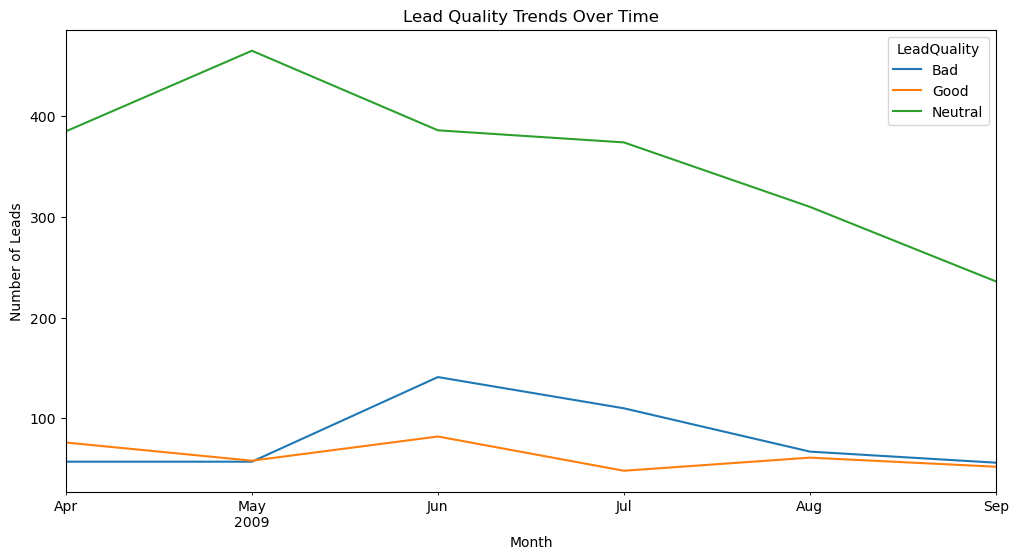

In [52]:
df['Month'] = df['LeadCreated'].dt.to_period('M') 
quality_trends = df.groupby(['Month', 'LeadQuality']).size().unstack(fill_value=0)


quality_trends.plot(kind='line', figsize=(12, 6))
plt.title('Lead Quality Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.show()


- Bad Leads:

From April to May we can see the leads are constant. There is a significant increase in the number of Bad leads starting from May to June, followed by a decline in July and then a further decrease in the following months.

- Good Leads:

The number of Good leads fluctuated, with the highest count in June. In general, the count of Good leads is lower compared to Bad and Neutral leads.

- Neutral Leads:

The number of Neutral leads fluctuates increases from April to May and thenit shows a gradual decrease from there.


In [53]:
from scipy.stats import chi2_contingency
# Contingency table for lead quality by time period
contingency_table = pd.crosstab(df['Month'], df['LeadQuality'])
# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Result:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test Result:
Chi-Square Value: 74.20419727028414
P-Value: 6.79521537199621e-12


Interpretation:

Chi-Square Value: A larger value indicates a stronger relationship between the variables, suggesting that the distribution of lead quality is not independent of time.

P-Value: Since the p-value is significantly lower than the common significance level of 0.05 , this indicates that the relationship between LeadQuality and Time is statistically significant.

In [54]:
import statsmodels.api as sm

# Converting LeadQuality to numeric (Good=1, Neutral=0, Bad=-1)
df['LeadQualityNumeric'] = df['LeadQuality'].map({'Good': 1, 'Neutral': 0, 'Bad': -1})
# Converting time to numeric
df['Time'] = (df['LeadCreated'] - df['LeadCreated'].min()) / np.timedelta64(1, 'M')
X = sm.add_constant(df['Time'])  # Adding constant for intercept
y = df['LeadQualityNumeric']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     LeadQualityNumeric   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.072
Date:                Thu, 30 Jan 2025   Prob (F-statistic):             0.0138
Time:                        17:39:23   Log-Likelihood:                -2387.4
No. Observations:                3021   AIC:                             4779.
Df Residuals:                    3019   BIC:                             4791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.019      0.173      0.8

**R-squared: 0.002**
This means that only 0.2% of the variability in LeadQualityNumeric is explained by Time. The model has very low explanatory power.

**Prob (F-statistic)**
Since the p-value is below 0.05, we reject the null hypothesis and conclude that the model as a whole is statistically significant.

**Coefficient for Time: -0.0146**
This indicates that for each one-unit increase in time, the predicted LeadQualityNumeric score decreases by 0.0146. The negative sign suggests that as time progresses, the lead quality tends to decline based on the model.

**P-value for Time: 0.014**
The p-value for the Time variable is less than 0.05, which means Time is statistically significant in predicting LeadQualityNumeric. In other words, there is a significant relationship between time and lead quality.

While there is a statistically significant trend indicating a decline in lead quality over time, the low R-squared suggests that other factors not captured by the model might be influencing lead quality.

**Conclusion:**

The analysis of lead quality trends over time reveals that there is a statistically significant relationship between lead quality and time. Specifically, the Chi-square test indicates that the distribution of lead quality is not independent of time, with a p-value much lower than the 0.05 significance threshold. Additionally, the OLS regression model suggests a negative trend, where lead quality tends to decline over time, as evidenced by the negative coefficient for the time variable.

However, while the relationship is statistically significant, the low R-squared value of 0.002 indicates that only a small portion of the variability in lead quality can be explained by time alone. This suggests that other factors, not captured by this analysis, could be influencing lead quality trends.

In summary, while there is evidence of a decline in lead quality over time, the model's limited explanatory power suggests that further investigation incorporating additional variables may be needed to better understand and predict lead quality changes.

[⬆ Back to Top](#top)

### b) Question 2 <a id="question-2"></a>

## 2. What can we learn about the drivers of "lead quality" from this dataset? What segments -where the ad was shown, what kind of person filled out the ad, what kind of ad did they see -have differing lead quality rates?

So we can divide the analysis into three sections:

**Where the ad was shown:**

* ReferralDomain -( The domain that drove traffic to the site.)
* PublisherZoneName - (Location of the ad on the publisher’s page.)
* LandingPageURL - (The URL where the user landed after clicking the ad.)
* PublisherCampaignName - (Describes whether the lead came from a call center or online form.)

**Who filled out the ad (consumer attributes):**

* State
* DebtLevel
* AddressScore & PhoneScore

**What kind of ad was seen:**

* AdvertiserCampaignName
* WidgetName
* MarketingCampaign
* AdGroup
* Keyword
* SearchQuery

In [55]:
#Checking the distribution once again
df['LeadQuality'].value_counts(normalize=True)

Neutral    0.713671
Bad        0.161536
Good       0.124793
Name: LeadQuality, dtype: float64

In [56]:
ref_domain_quality = df.groupby('ReferralDomain')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(ref_domain_quality)

ReferralDomain
www.consolidate-my-debt-now.com    1.0
us.mc832.mail.yahoo.com            1.0
by116w.bay116.mail.live.com        1.0
www.tiphero.com                    1.0
us.mg1.mail.yahoo.com              1.0
                                  ... 
cbs2.com                          -1.0
www.attourney.com                 -1.0
us.mc825.mail.yahoo.com           -1.0
www.moneypowercenter.com          -1.0
www.federaldebtrelief.com         -1.0
Name: LeadQualityNumeric, Length: 374, dtype: float64


Filtering out referral domains that have too few records. This ensures that the results reflect domains with sufficient data.

In [57]:
# Counting the number of occurrences per ReferralDomain
referral_counts = df['ReferralDomain'].value_counts()
# Filtering domains with fewer than 10 occurrences
valid_ref_domains = referral_counts[referral_counts >= 10].index
# Filtering the original DataFrame to only include these domains
filtered_ref_domain_quality = df[df['ReferralDomain'].isin(valid_ref_domains)]
# Recalculating LeadQuality by ReferralDomain
ref_domain_quality = filtered_ref_domain_quality.groupby('ReferralDomain')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(ref_domain_quality)

ReferralDomain
search.mywebsearch.com             0.153846
www.findstuff.com                  0.111111
search.aol.com                     0.043478
collegesavings.about.com           0.000000
www.justclicklocal.com             0.000000
www.bing.com                       0.000000
pagead2.googlesyndication.com      0.000000
search.yahoo.com                   0.000000
www.google.com                    -0.008147
ezinearticles.com                 -0.059406
Missing                           -0.073770
No ReferralDomain - Call Center   -0.084871
googleads.g.doubleclick.net       -0.086207
www.ehow.com                      -0.086957
wiki.answers.com                  -0.090909
searchportal.information.com      -0.090909
www.debtreductioninc.com          -0.105263
us.yhs.search.yahoo.com           -0.142857
www.soyouwanna.com                -0.157895
www.ask.com                       -0.181818
en.allexperts.com                 -0.181818
www.webcrawler.com                -0.312500
Name: LeadQuality

For better picture plotting the values.

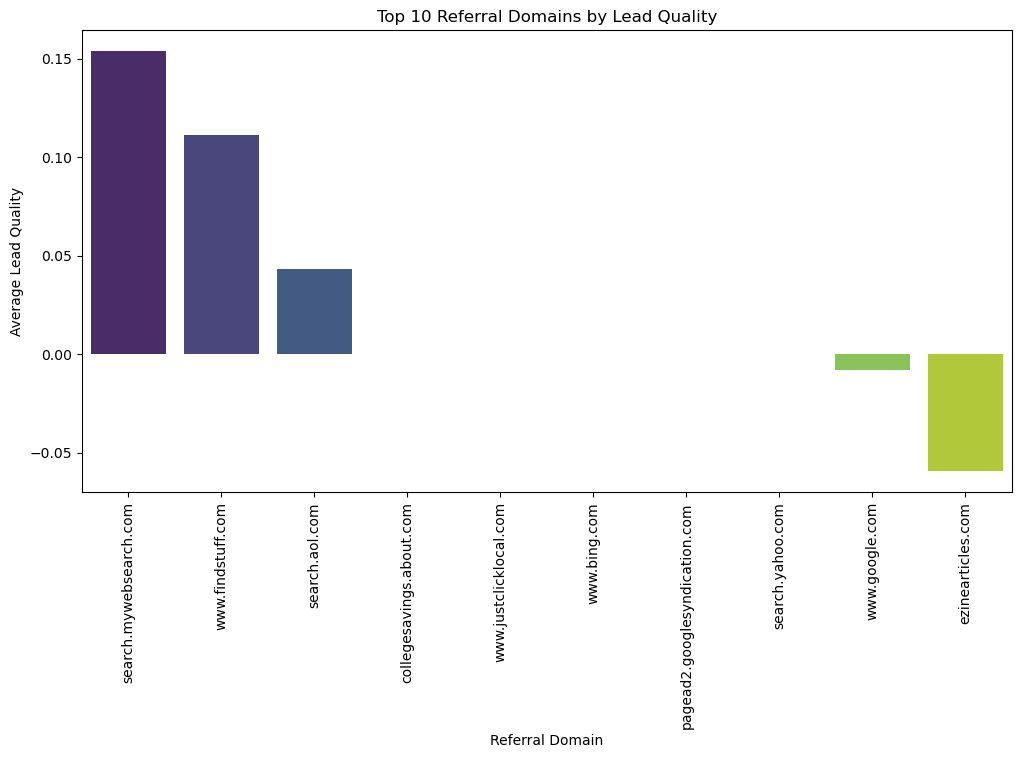

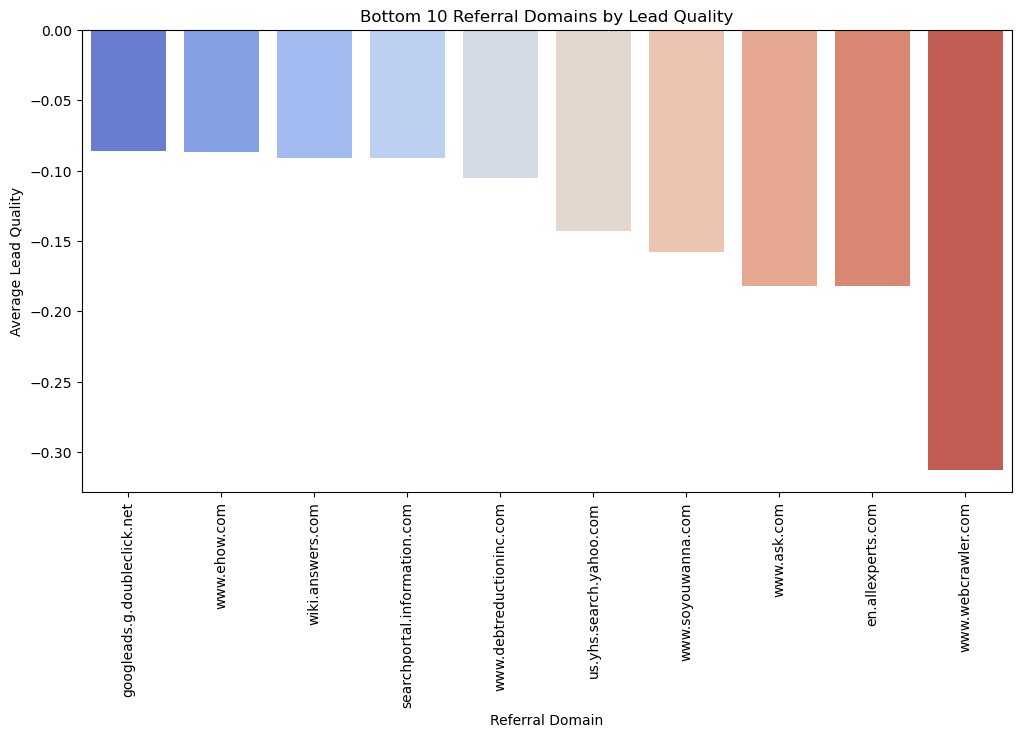

In [58]:
# Plotting the top 10 domains with the highest lead quality
plt.figure(figsize=(12, 6))
sns.barplot(x=ref_domain_quality.head(10).index, y=ref_domain_quality.head(10).values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Referral Domain")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Referral Domains by Lead Quality")
plt.show()
# Plotting the bottom 10 domains with the lowest lead quality
plt.figure(figsize=(12, 6))
sns.barplot(x=ref_domain_quality.tail(10).index, y=ref_domain_quality.tail(10).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Referral Domain")
plt.ylabel("Average Lead Quality")
plt.title("Bottom 10 Referral Domains by Lead Quality")
plt.show()

search.mywebsearch.com stands out as one of the higher-quality domains.

search.mywebsearch.com and ww.findstuff.com show positive lead quality scores, meaning they are associated with higher-quality leads. On the other hand, domains like ww.webcrawler.com, ww.ask.com, and ww.debtreductioninc.com have negative lead quality scores, indicating they might be associated with lower-quality leads.


One might expect Google or Yahoo to consistently bring in high-quality leads, given their broad reach and established reputation. However, mywebsearch.com, a less recognized search engine, is delivering better leads on average. This could indicate that the users on this platform are more engaged or have a higher intent when searching for the type of product or service you're offering. Sometimes, niche search engines or less mainstream referral sources can target specific user demographics with more relevant ads, leading to higher-quality leads. It could also mean that ads on mywebsearch.com are presented to users who are already somewhat pre-qualified or show more interest in the advertised offerings.

In [59]:
# Grouping by PublisherZoneName and calculat ingthe average Lead Quality
zone_quality = df.groupby('PublisherZoneName')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(zone_quality)

PublisherZoneName
TopLeft-302252      -0.032000
Top Right-300x250   -0.084871
Name: LeadQualityNumeric, dtype: float64


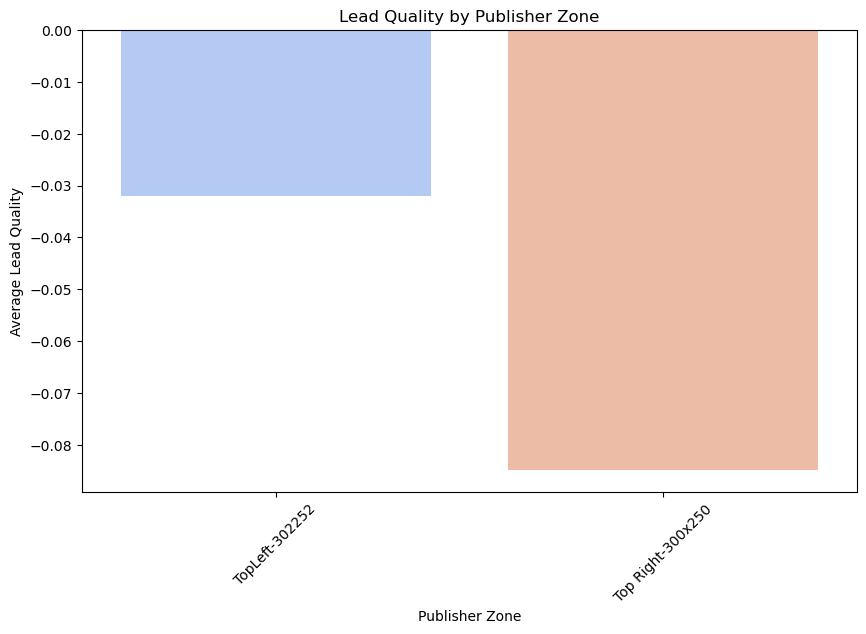

In [60]:
# PublisherZoneName
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_quality.index, y=zone_quality.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Publisher Zone")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Publisher Zone")
plt.show()

The two zones, TopLeft-302252 and Top Right-300x250, both have negative average lead quality scores.

In [61]:
# LandingPageURL
landing_page_quality = df.groupby('LandingPageURL')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(landing_page_quality)

LandingPageURL
http://www.inadcoad.com/CallCenter/Signius/CallCenterDRI.html             0.000000
http://www.debtreductioninc.com/index8.html                              -0.021260
http://www.debtreductioninc.com/index11.html                             -0.104651
https://callcenter.inadcoads.com/callcenter/signius/CallCenterDRI.html   -0.122340
http://www.debtreductioninc.com/index12.html                             -0.201613
Name: LeadQualityNumeric, dtype: float64


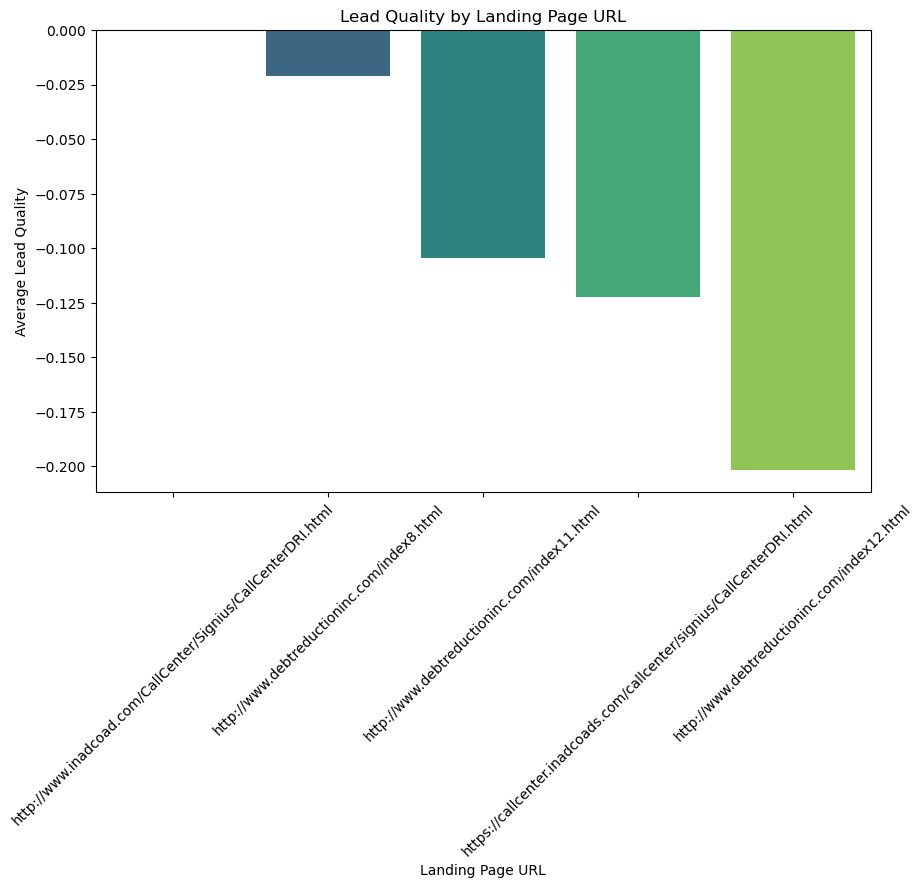

In [62]:
# LandingPageURL
plt.figure(figsize=(10, 6))
sns.barplot(x=landing_page_quality.index, y=landing_page_quality.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Landing Page URL")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Landing Page URL")
plt.show()

Since all leads are directed to the same set of landing pages, this suggests that the entire lead flow is being influenced by these landing pages. If these landing pages have a negative or zero average LeadQualityNumeric score, it means that most of the leads coming through this funnel are being considered low quality.

In [63]:
# Grouping by PublisherCampaignName
campaign_quality = df.groupby('PublisherCampaignName')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(campaign_quality)

PublisherCampaignName
DebtReductionInc          -0.032000
DebtReductionCallCenter   -0.084871
Name: LeadQualityNumeric, dtype: float64


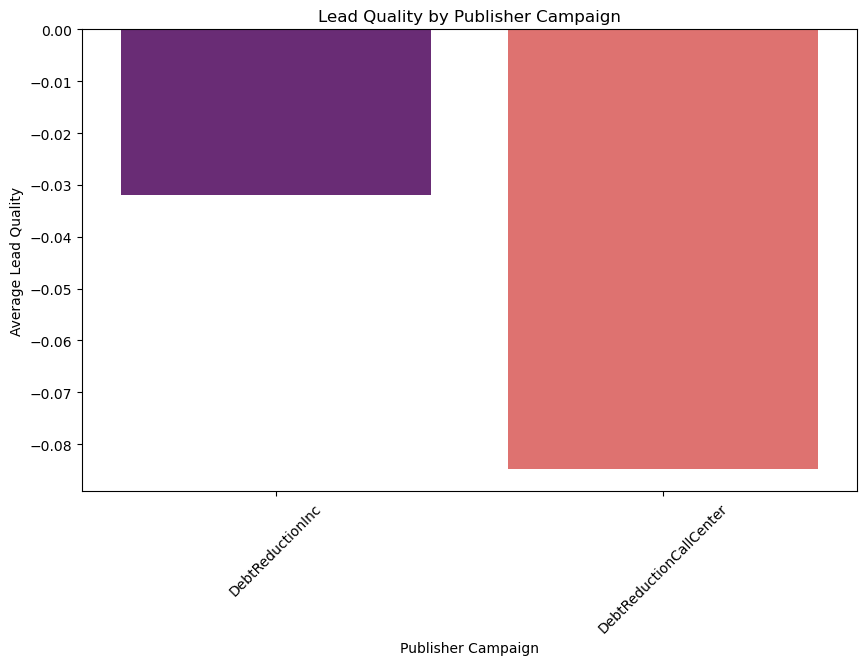

In [64]:
# PublisherCampaignName
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_quality.index, y=campaign_quality.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Publisher Campaign")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Publisher Campaign")
plt.show()

Both DebtReductionInc and DebtReductionCallCenter campaigns show negative average lead quality scores, which could suggest these campaigns are not as effective.

In [65]:
# Grouping by State and calculating the average Lead Quality
state_quality = df.groupby('State')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(state_quality)

State
AK    0.125000
OK    0.080000
IA    0.052632
NE    0.045455
HI    0.031250
VA    0.020690
WV    0.019231
AL    0.010417
CT    0.000000
TX   -0.003077
CA   -0.010799
MA   -0.014286
NV   -0.018519
WA   -0.035714
MO   -0.044444
FL   -0.045977
MI   -0.048276
IL   -0.048387
LA   -0.050000
PA   -0.053333
CO   -0.057143
AR   -0.062500
OR   -0.074074
MT   -0.083333
NY   -0.084806
NM   -0.103448
AZ   -0.106383
IN   -0.111111
MD   -0.112245
SD   -0.272727
DC   -0.333333
ND   -0.333333
Name: LeadQualityNumeric, dtype: float64


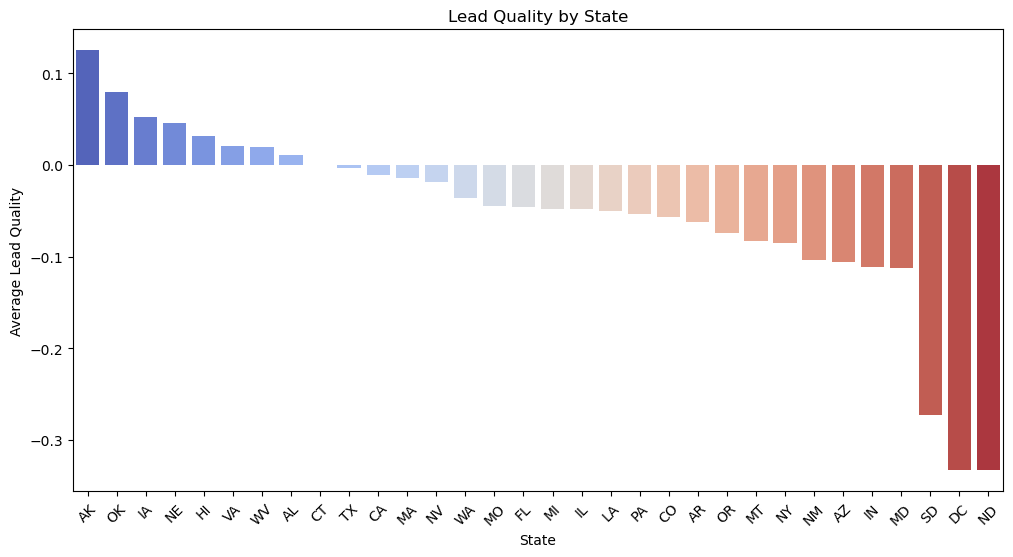

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_quality.index, y=state_quality.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by State")
plt.show()

**Observations:**

- States like Alaska, Oklahoma, and Iowa have relatively positive lead quality scores, suggesting that these states might be more likely to generate higher-quality leads.
- States such as North Dakota, District of Columbia, and South Dakota have significantly negative lead quality scores. These states might be associated with lower-quality leads, indicating that the leads from these regions could be less relevant or less likely to convert.
- Connecticut and Texas have a lead quality score close to zero, indicating that the leads from these states are average or neutral in terms of quality.

**What can we infer?**

Regional Market Dynamics: Certain states might have more engaged or interested consumers, while others may have lower engagement.

Targeting Effectiveness: Some regions might be better targeted by the ads, leading to higher-quality leads.

Demographics: States with better financial health or higher debt levels could correlate with higher-quality leads. Conversely, regions with more budget-conscious or less engaged populations could result in lower-quality leads.


In [67]:
# Grouping by DebtLevel and calculating the average Lead Quality
debt_level_quality = df.groupby('DebtLevel')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(debt_level_quality)

DebtLevel
70001-90000         0.061069
50001-70000         0.016327
7500-15000          0.014760
15001-20000         0.012255
10001-15000         0.003436
20001-30000        -0.002193
90000-100000       -0.033333
30001-50000        -0.050403
More_than_100000   -0.136126
7500-10000         -0.176471
Name: LeadQualityNumeric, dtype: float64


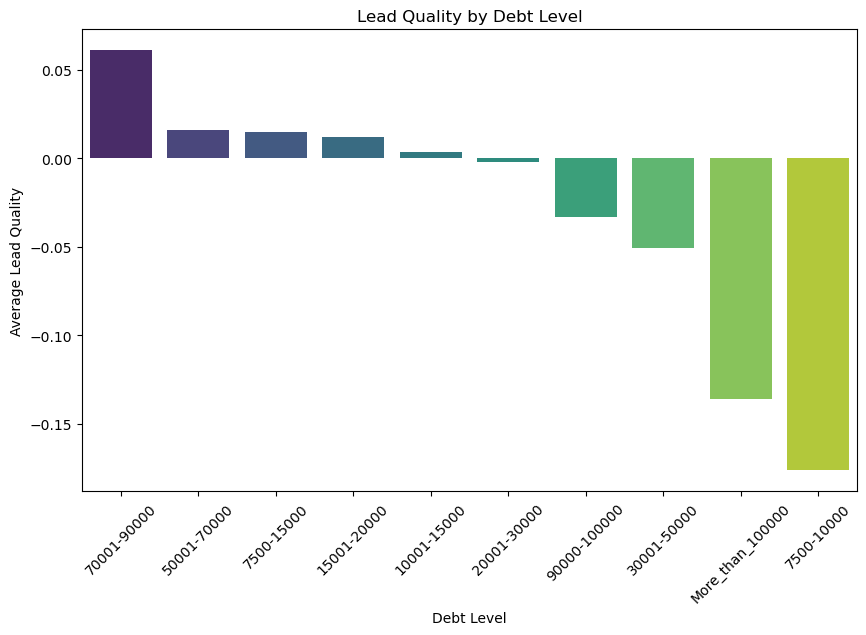

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=debt_level_quality.index, y=debt_level_quality.values, palette="viridis")
plt.xlabel("Debt Level")
plt.xticks(rotation=45)
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Debt Level")
plt.show()

- Higher Debt Levels (70001-90000): The highest average lead quality (0.061) is associated with debt levels in the range of 70001-90000, indicating that individuals with higher debt might be more engaged or ready to respond to ads, leading to higher-quality leads.
- Moderate Debt Levels (50001-70000): Debt levels between 50001-70000 also show a positive lead quality (0.016), though it's lower than the highest range, suggesting that individuals in this range are somewhat engaged.
- Low Debt Levels (7500-15000, 15001-20000): Debt levels in the 7500-15000 and 15001-20000 ranges show modestly positive lead quality scores, indicating that people in these categories might still be interested, but their leads are not as high quality as those in higher debt brackets.
- Negative Lead Quality (Below 7500): For debt levels such as 7500-10000 (-0.176), More_than_100000 (-0.136), and 30001-50000 (-0.050), we see negative lead quality scores, which suggests that people in these debt ranges might be less likely to convert or engage with the offers, leading to lower-quality leads.

In [69]:
# AddressScore
address_score_quality = df.groupby('AddressScore')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(address_score_quality)

AddressScore
2.0    0.000000
5.0   -0.025287
-1    -0.029189
1.0   -0.098361
3.0   -0.150538
4.0   -0.187500
Name: LeadQualityNumeric, dtype: float64


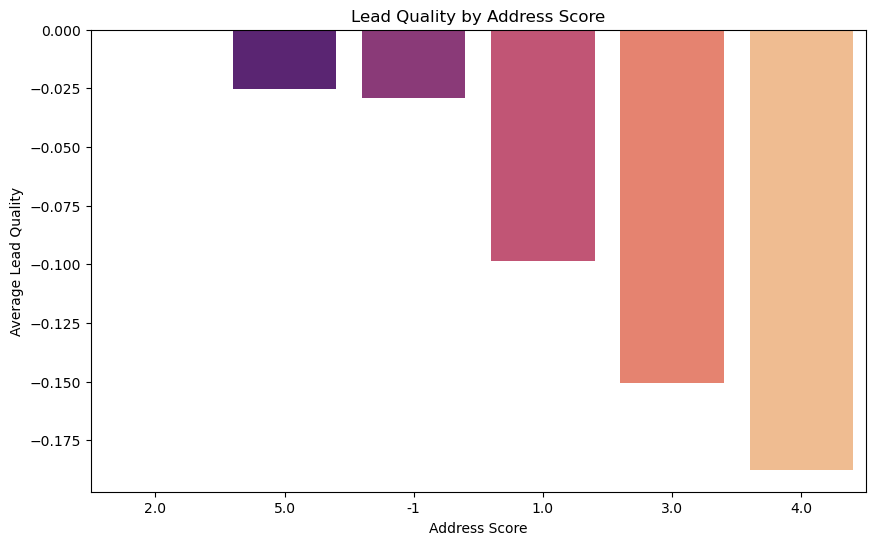

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=address_score_quality.index, y=address_score_quality.values, palette="magma")
plt.xlabel("Address Score")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Address Score")
plt.show()

- Higher AddressScores (2.0, 5.0) have relatively small negative or zero values for lead quality, indicating that these leads might still be of reasonable quality.

- Lower AddressScores (1.0, 3.0, 4.0) show more negative values for lead quality, suggesting that leads with lower address credibility (maybe due to incomplete or inaccurate data) tend to have worse lead quality.

In [71]:
# PhoneScore
phone_score_quality = df.groupby('PhoneScore')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(phone_score_quality)

PhoneScore
5.0    0.001616
-1    -0.022113
3.0   -0.091335
4.0   -0.097826
2.0   -0.111111
1.0   -1.000000
Name: LeadQualityNumeric, dtype: float64


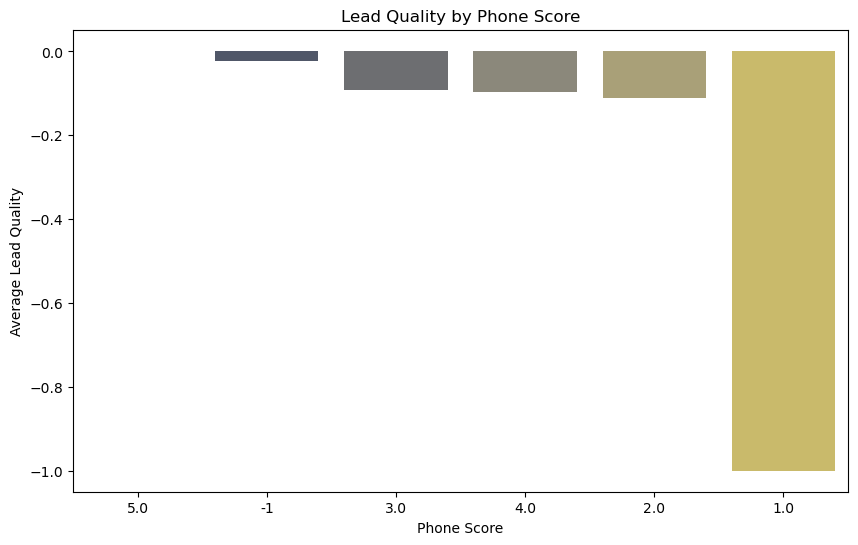

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phone_score_quality.index, y=phone_score_quality.values, palette="cividis")
plt.xlabel("Phone Score")
plt.ylabel("Average Lead Quality")
plt.title("Lead Quality by Phone Score")
plt.show()

- PhoneScore 5.0 has a slightly positive lead quality, but it's very close to zero, suggesting that leads with a perfect phone score don't drastically improve lead quality.
- PhoneScore -1 (likely representing missing or invalid phone numbers) shows a mild negative impact on lead quality.
- The lower PhoneScores (1.0, 2.0) show significant negative lead quality, with PhoneScore 1.0 exhibiting the most extreme negative impact, suggesting that leads with poorer phone data or lower scores are much less likely to be of high quality.

In [73]:
# AdvertiserCampaignName
campaign_quality = df.groupby('AdvertiserCampaignName')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(campaign_quality)

AdvertiserCampaignName
creditsolutions-branded-shortform   -0.032338
Debt Settlement1 Master             -0.039669
Name: LeadQualityNumeric, dtype: float64


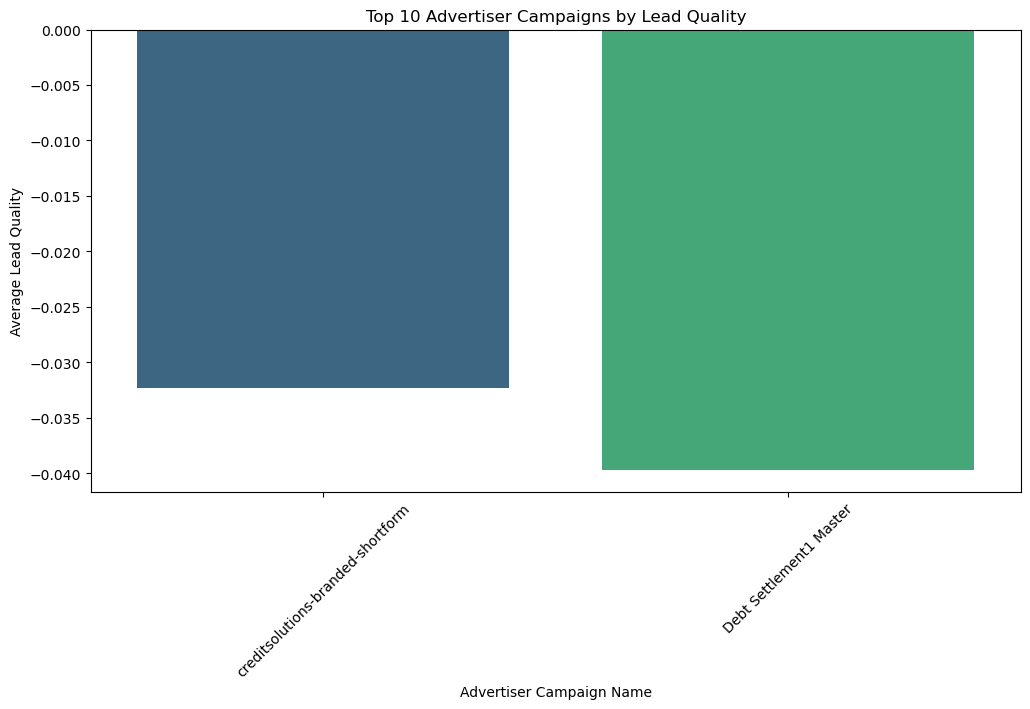

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_quality.head(10).index, y=campaign_quality.head(10).values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Advertiser Campaign Name")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Advertiser Campaigns by Lead Quality")
plt.show()

The creditsolutions-branded-shortform campaign has a slightly better lead quality than Debt Settlement1 Master, as its LeadQualityNumeric is closer to zero. Although both campaigns have negative values, they are close to each other, meaning their lead quality is fairly similar

In [75]:
# WidgetName
widget_quality = df.groupby('WidgetName')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(widget_quality)

WidgetName
w-300250-DebtReduction1-1DC-CreditSolutions     0.168831
w-300250-DebtReduction1-1DC-white               0.166667
w-300250-DebtReduction1-1DC-BlueMeter           0.108696
w-300250-DebtReduction1-1DC-Head2               0.067416
w-300250-DebtReduction1-2DC-BlueMeter           0.034483
w-302252-DebtReduction1-1DC-yellowarrow         0.020408
w-302252-DebtReduction1-1DC                    -0.022059
w-300250-DebtReduction1-1DC-Head3              -0.040000
w-302252-DebtReduction1-1DC-CreditSolutions    -0.045541
w-300250-DebtReduction1-2DC-CreditSolutions    -0.053333
w-302252-DebtReduction1-1DC-white              -0.060465
w-300250-DebtReduction1-1DC                    -0.074713
w-302252-DebtReduction1-1DC-yellowarrow-blue   -0.086207
w-302252-DebtReduction1-1DC-yellowarrow-dark   -0.088889
Name: LeadQualityNumeric, dtype: float64


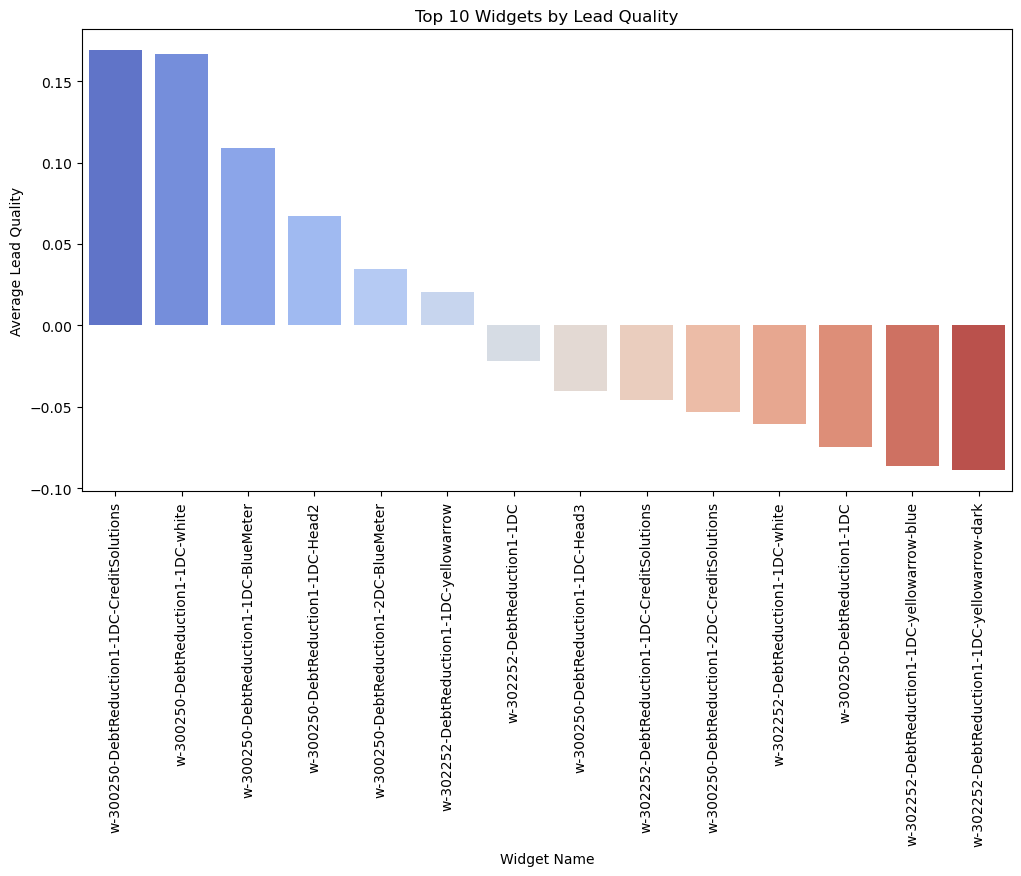

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x=widget_quality.index, y=widget_quality.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Widget Name")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Widgets by Lead Quality")
plt.show()

Positive Lead Quality:

Widgets like w-300250-DebtReduction1-1DC-CreditSolutions and w-300250-DebtReduction1-1DC-white generate higher-quality leads, as their scores are significantly positive. This suggests that these widget versions resonate more with consumers or are better targeted, leading to higher engagement and more valuable leads.

Negative Lead Quality:

Widgets like w-302252-DebtReduction1-1DC-yellowarrow-blue and w-302252-DebtReduction1-1DC-yellowarrow-dark have very low or negative lead quality scores, indicating that the leads generated from these widgets are of poorer quality.

---
w-302252-DebtReduction1-1DC-yellowarrow, w-302252-DebtReduction1-1DC-yellowarrow-blue, and w-302252-DebtReduction1-1DC-yellowarrow-dark—which are essentially the same widget design with only color differences—show such a stark difference in LeadQualityNumeric

In [77]:
# Counting the number of occurrences per MarketingCampaign
campaign_counts = df['MarketingCampaign'].value_counts()
# Filtering campaigns with fewer than 10 occurrences
valid_campaigns = campaign_counts[campaign_counts >= 10].index
# Filtering the original DataFrame to only include these campaigns
filtered_campaign_quality = df[df['MarketingCampaign'].isin(valid_campaigns)]
# Recalculating LeadQuality by MarketingCampaign
campaign_quality = filtered_campaign_quality.groupby('MarketingCampaign')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(campaign_quality)

MarketingCampaign
Debt Holding Tank                                0.079882
Financial Services                               0.052632
Debt Volume                                      0.034965
state                                            0.010309
Credit                                          -0.020000
DebtReductionInc                                -0.050204
No MarketingCampaign - Call Center              -0.084871
Debt Consolidation                              -0.088235
DebtReductionInc - YSM Restructure (05/29/09)   -0.130435
Debt General                                    -0.139818
Debt Volume_CA                                  -0.166667
Name: LeadQualityNumeric, dtype: float64


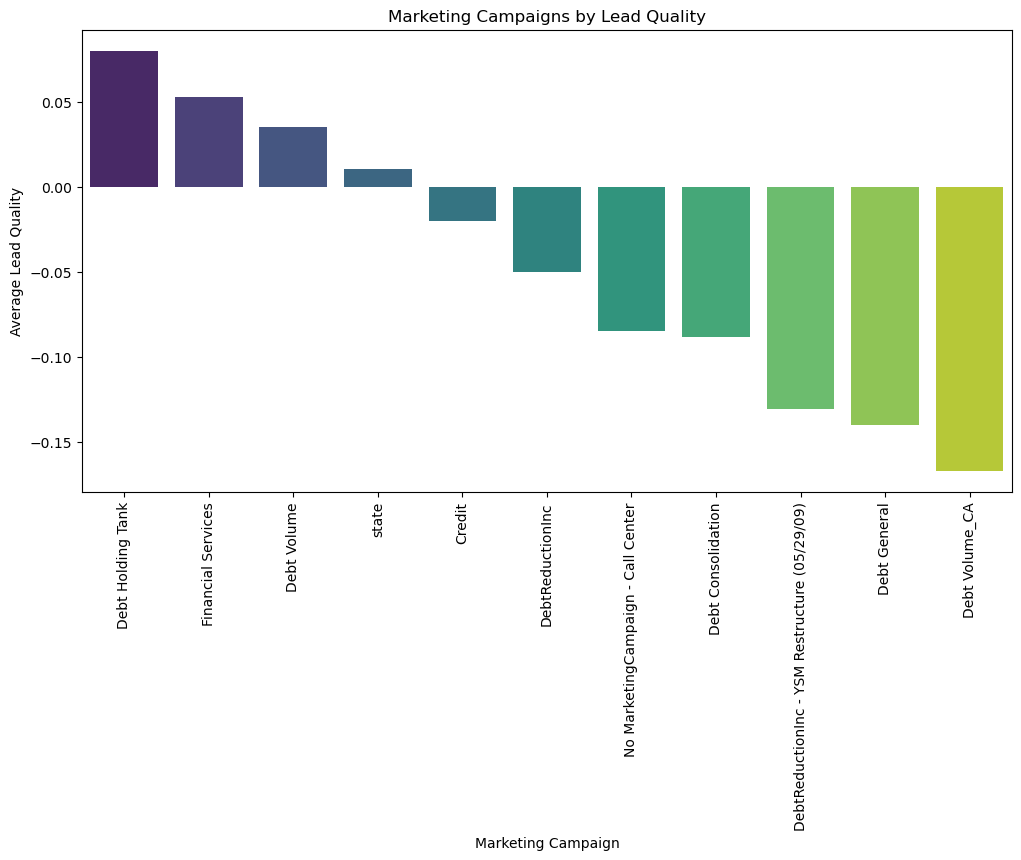

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_quality.index, y=campaign_quality.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Marketing Campaign")
plt.ylabel("Average Lead Quality")
plt.title("Marketing Campaigns by Lead Quality")
plt.show()

- Positive Impact on Lead Quality

Debt Holding Tank (0.079882) and Financial Services (0.052632) have the highest Lead Quality, indicating that these marketing campaigns attract higher-quality leads. These campaigns may target more specific or well-defined consumer segments, likely leading to more engaged and serious prospects.

- Neutral to Mild Negative Impact

Debt Volume (0.034965) and state (0.010309) have small positive or neutral values, suggesting they don’t significantly affect lead quality either way. These campaigns may be broader in nature, attracting a wider but less focused audience, or the geographic focus (state) may have varying levels of engagement.

- Strong Negative Impact on Lead Quality

DebtReductionInc (-0.050204), Debt Consolidation (-0.088235), Debt Volume_CA (-0.166667), and Debt General (-0.139818) show a significant negative lead quality. These campaigns could be targeting a less engaged or less relevant audience, possibly due to generic messaging or targeting lower-intent consumers. The DebtReductionInc - YSM Restructure (05/29/09) campaign, with -0.130435.


In [79]:
# Counting the number of occurrences per AdGroup
adgroup_counts = df['AdGroup'].value_counts()
# Filtering AdGroups with fewer than 10 occurrences
valid_adgroups = adgroup_counts[adgroup_counts >= 10].index
# Filtering the original DataFrame to only include these AdGroups
filtered_adgroup_quality = df[df['AdGroup'].isin(valid_adgroups)]
# Recalculating LeadQuality by AdGroup
adgroup_quality = filtered_adgroup_quality.groupby('AdGroup')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(adgroup_quality)

AdGroup
Debt Negotiation                    0.142857
Debt                                0.129032
Stop Collections                    0.113208
Debt Consolidation                  0.081633
Holding Tank - Debt                 0.079882
Consolidate                         0.053254
Credit Card Consolidation           0.047619
General Debt                        0.046154
Credit Card Debt                    0.015152
Debt Consolidation - high volume    0.000000
General Debt - high volume          0.000000
Get Out Of Debt                     0.000000
Credit Debt Consolidation           0.000000
Debt Services                       0.000000
Credit Card Debt - high volume     -0.019380
How                                -0.026087
Credit Card Reduction              -0.050000
Debt Program                       -0.071429
No AdGroup - Call Center           -0.084871
Bankruptcy And Chapter 7           -0.090909
File Bankruptcy                    -0.090909
Debt Credit Services               -0.090909
Ch

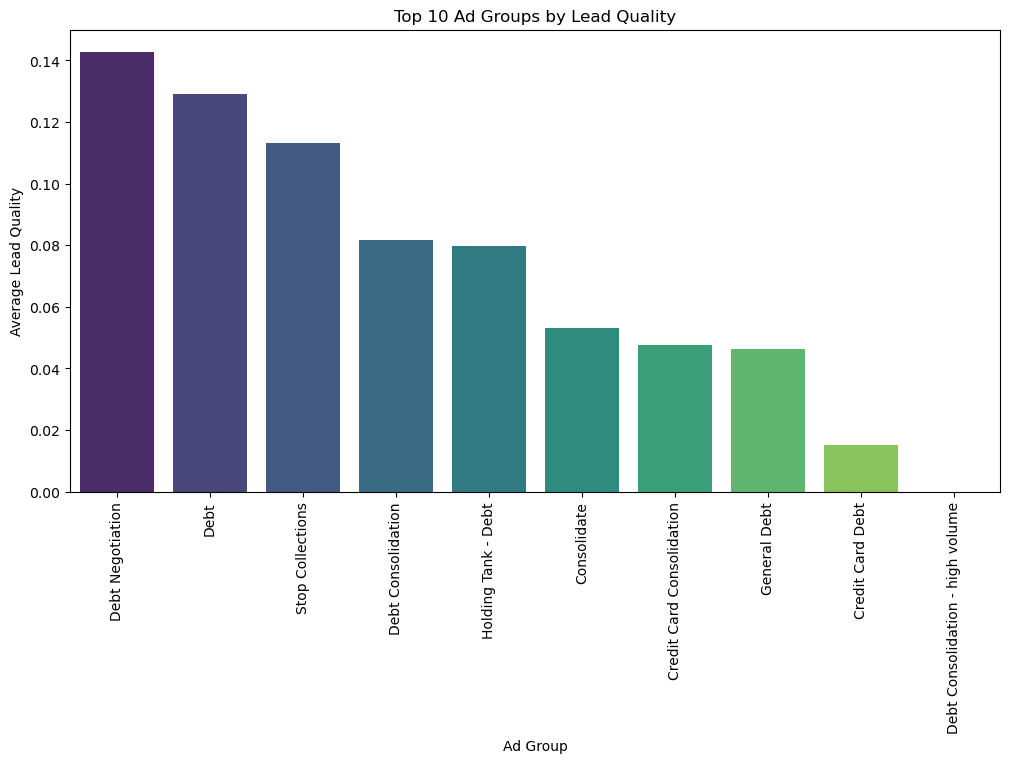

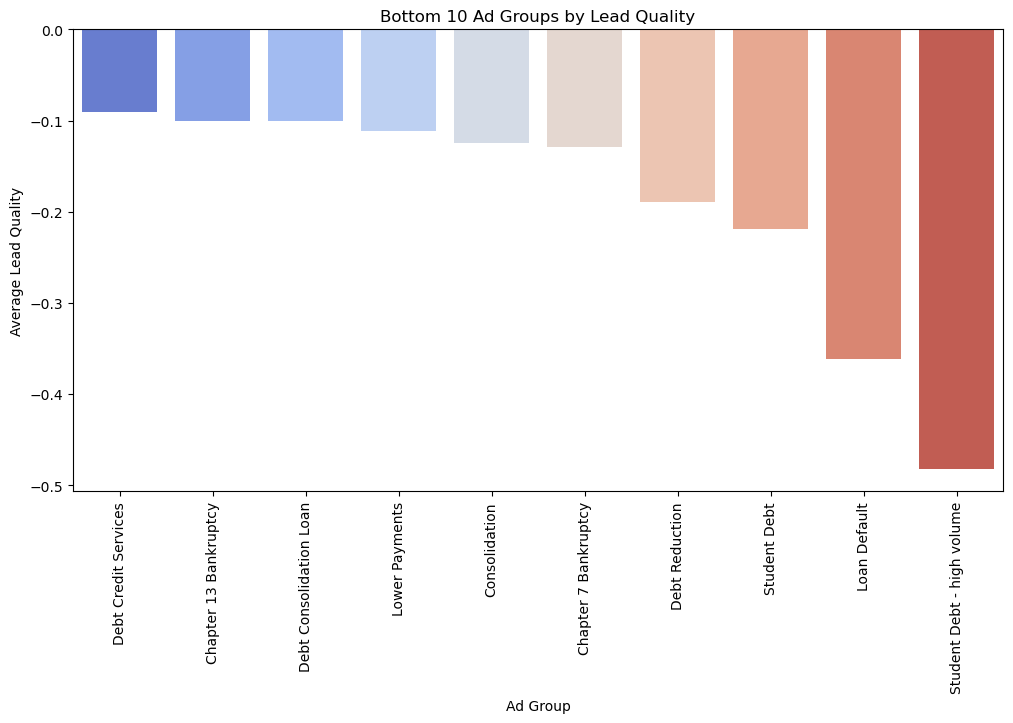

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x=adgroup_quality.head(10).index, y=adgroup_quality.head(10).values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Ad Group")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Ad Groups by Lead Quality")
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=adgroup_quality.tail(10).index, y=adgroup_quality.tail(10).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Ad Group")
plt.ylabel("Average Lead Quality")
plt.title("Bottom 10 Ad Groups by Lead Quality")
plt.show()

1. Positive Lead Quality (High Intent)

Debt Negotiation (0.142857), Debt (0.129032), and Stop Collections (0.113208) AdGroups have higher lead quality values. These campaigns likely target individuals actively seeking solutions for managing debt, indicating high-intent consumers who are more likely to engage seriously with the services offered.

2. Neutral to Mild Negative Impact

Consolidate (0.053254) and Credit Card Consolidation (0.047619) AdGroups show mildly positive lead quality. These may target individuals with broad financial concerns but aren't as specific or high-intent as the more focused debt negotiation campaigns.


3. Significant Negative Lead Quality (Low Intent)

Loan Default (-0.361111) and Student Debt - high volume (-0.482759) are the lowest-performing AdGroups, likely reflecting lower-intent consumers who may not be actively seeking immediate solutions, or they might have more complex needs that are harder to address, thus resulting in a higher volume of poor-quality leads.


In [81]:
# Counting the number of occurrences per SearchQuery
searchquery_counts = df['SearchQuery'].value_counts()
# Filtering SearchQueries with fewer than 10 occurrences
valid_searchqueries = searchquery_counts[searchquery_counts >= 10].index
# Filtering the original DataFrame to only include these SearchQueries
filtered_searchquery_quality = df[df['SearchQuery'].isin(valid_searchqueries)]
# Recalculating LeadQuality by SearchQuery
searchquery_quality = filtered_searchquery_quality.groupby('SearchQuery')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(searchquery_quality)

SearchQuery
debt rescue usa                      0.400000
consumer debt initiative             0.272727
credit card debt                     0.100000
debt consolidation                   0.037037
NoSearchQuery                       -0.049158
No SearchQuery - Call Center        -0.084871
bankruptcy laws                     -0.200000
www.chase.com creditcards payment   -0.200000
debt cures                          -0.222222
credit services                     -0.300000
Name: LeadQualityNumeric, dtype: float64


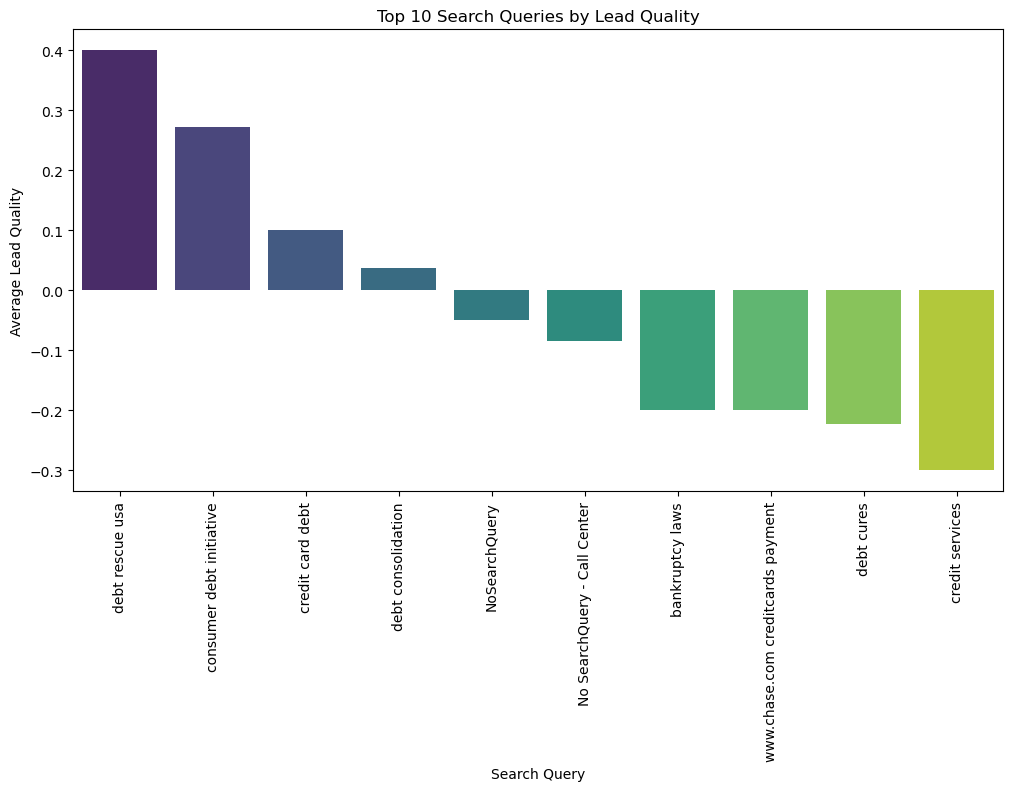

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x=searchquery_quality.index, y=searchquery_quality.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Search Query")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Search Queries by Lead Quality")
plt.show()

1. Positive Lead Quality from Search Queries

Debt rescue usa (0.400000) and consumer debt initiative (0.272727) search queries have high lead quality, indicating that individuals searching for these terms likely have high intent for debt resolution services. 

2. Neutral to Mild Negative Impact from Search Queries

NoSearchQuery (-0.049158) and No SearchQuery - Call Center (-0.084871) suggest that users without a specific search query or those coming from a call center are likely less engaged, resulting in poorer-quality leads.

3. Significant Negative Lead Quality from Search Queries

www.chase.com creditcards payment (-0.200000) and credit services (-0.300000) search queries are significantly negative. These queries are likely from people looking for general credit services or financial institutions, rather than those with specific needs for debt resolution, thus leading to much lower lead quality.


In [83]:
# Counting the number of occurrences per Keyword
keyword_counts = df['Keyword'].value_counts()
# Filtering Keywords with fewer than 10 occurrences
valid_keywords = keyword_counts[keyword_counts >= 10].index
# Filtering the original DataFrame to only include these Keywords
filtered_keyword_quality = df[df['Keyword'].isin(valid_keywords)]
# Recalculating LeadQuality by Keyword
keyword_quality = filtered_keyword_quality.groupby('Keyword')['LeadQualityNumeric'].mean().sort_values(ascending=False)
print(keyword_quality)

Keyword
American debt               0.250000
Debt rescue usa             0.250000
Consumer debt initiative    0.150000
Debt                        0.130435
Credit counselor            0.055556
Debt negotiation lawyer     0.000000
NoKeyword                  -0.036702
No Keyword - Call Center   -0.084871
debt                       -0.092308
Credit card payments       -0.096154
Credit services            -0.142857
Defaulted student loans    -0.200000
Student loan default       -0.215686
Debt cures                 -0.285714
Loans in default           -0.357143
Loan default help          -0.431818
Name: LeadQualityNumeric, dtype: float64


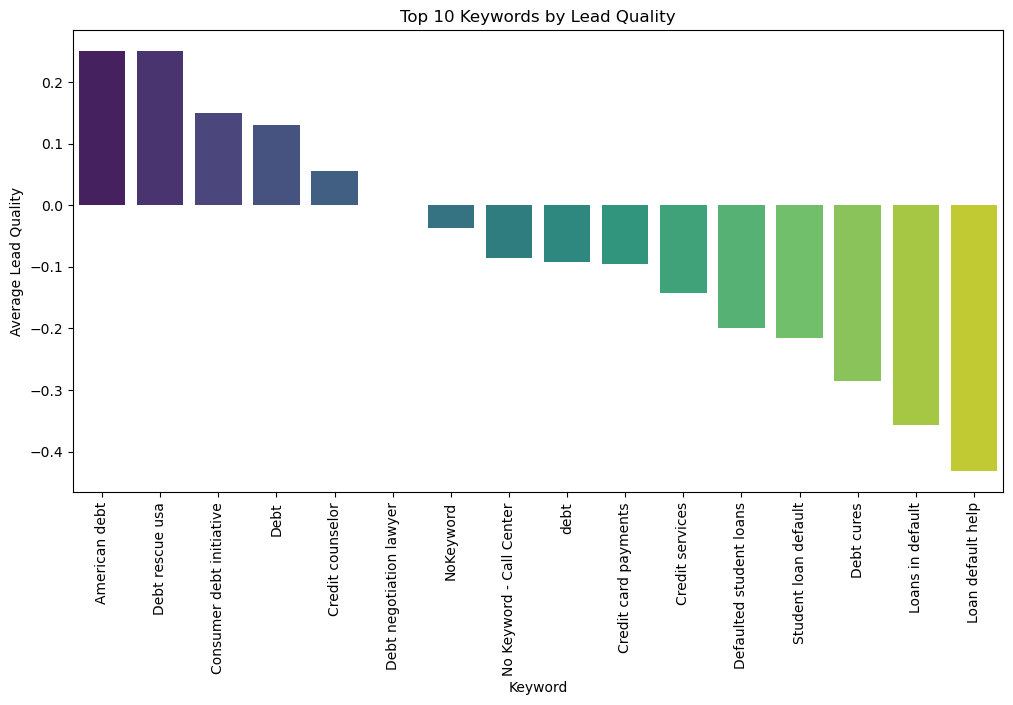

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_quality.index, y=keyword_quality.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Keyword")
plt.ylabel("Average Lead Quality")
plt.title("Top 10 Keywords by Lead Quality")
plt.show()

1. Positive Lead Quality from Keywords

American debt (0.250000) and Debt rescue usa (0.250000) keywords show high lead quality, as they likely target individuals who are actively searching for targeted debt-related services.

2. Neutral to Mild Negative Impact from Keywords

Debt negotiation lawyer (0.000000) and NoKeyword (-0.036702) keywords have neutral or slightly negative lead quality, suggesting that these keywords may not fully capture high-intent leads, possibly due to broader or less specific targeting.

3. Significant Negative Lead Quality from Keywords

Debt cures (-0.285714), Loans in default (-0.357143), and Loan default help (-0.431818) keywords indicate a low-quality lead. These keywords likely attract individuals who are in financial distress or have complex debt situations, making them less likely to engage meaningfully with the offered services.

**Conclusion:**

The analysis reveals that lead quality is driven by several factors, including where the ad was shown, who filled out the ad, and what kind of ad was seen. High-quality leads are associated with specific referral domains, publisher zones, and landing pages that attract engaged users. Consumer attributes like debt level, location, and scores for address and phone validity play a key role in determining lead quality. Ads linked to targeted campaigns like Debt Negotiation or Debt Holding Tank generate better leads compared to more generic ads. Additionally, search queries and keywords that focus on high-intent terms like debt rescue or consumer debt initiative yield higher-quality leads. By optimizing ad targeting, focusing on personalized campaigns, and selecting reliable referral sources, businesses can significantly improve lead quality.

[⬆ Back to Top](#top)

### c) Question 3 <a id="question-3"></a>

## 3. If the advertiser says they will increase our CPL by 20% (i.e., 30 to 33 dollars) if we increase our lead quality by 20% (i.e., from 8.0% to 9.6%), do we see any opportunities to do that here? What kinds of things could we do?

To determine whether we can increase lead quality by 20% (from 8.0% to 9.6%) and justify the advertiser’s 20% increase in CPL (from $30 to $33), we need to assess where improvements can be made while ensuring that the cost per lead remains sustainable.  Based on the previous analysis, here are a few potential strategies:

**1. Identifying High-Performing Segments**

Certain AdGroups, Keywords, Search Queries, WidgetNames, and Referral Domains already produce above-average lead quality. By focusing on these high-performing segments, we can drive a larger share of traffic from them, which can lead to an overall increase in lead quality.

- Best AdGroups:

"Debt Negotiation" (0.142), "Debt" (0.129), and "Stop Collections" (0.113) show strong lead quality.
We should increase budget allocation for these AdGroups and test different variations to maximize their impact.
On the other hand, low-quality AdGroups like "Loan Default" (-0.36) and "Student Debt - High Volume" (-0.48) should be reduced or restructured.

- Best Keywords:

"Debt Rescue USA" (0.25), "American Debt" (0.25), and "Consumer Debt Initiative" (0.15) generate high lead quality.
Expanding campaigns using similar high-intent keywords and testing long-tail variations could improve conversion rates.
Keywords like "Credit Services" (-0.14), "Loans in Default" (-0.35), and "Debt Cures" (-0.28) produce low-quality leads and should be reconsidered.

- Search Queries:

"Debt Rescue USA" (0.40) and "Consumer Debt Initiative" (0.27) show significant potential, meaning searches related to these indicate strong buyer intent.
We should increase bids and ensure ad copy alignment with these high-performing search queries.
Queries like "Bankruptcy Laws" (-0.20) and "Debt Cures" (-0.22) are less likely to result in high-quality leads, so spend should be reduced here.

**2. Optimizing Marketing Campaigns**

Different MarketingCampaigns perform at varying lead quality levels.

"Debt Holding Tank" (0.08) and "Financial Services" (0.05) show positive lead quality, while campaigns like "Debt General" (-0.14) and "Debt Volume_CA" (-0.16) are underperforming.
Budget should shift towards high-performing campaigns, while low-performing ones should be restructured or paused.

**3. Improving Widget and Ad Placement**

Widgets that generate higher lead quality include:
"w-300250-DebtReduction1-1DC-CreditSolutions" (0.168)
"w-300250-DebtReduction1-1DC-white" (0.166)
By increasing traffic to these widgets, we can improve overall lead quality.
However, widgets like "w-302252-DebtReduction1-1DC-yellowarrow-dark" (-0.08) show poor lead quality and should be tested with different creatives or phased out.

**4. Adjusting Targeting Criteria**

Leads from certain Referral Domains and Publisher Zones perform better than others.
High-quality referral sources should receive higher ad placements.
Low-performing referral sources should either be optimized or removed to prevent wasted spend.

**5. Refining Consumer Segmentation**

Leads with higher AddressScore and PhoneScore tend to have better conversion potential.
We can adjust lead filtering criteria to exclude lower-scoring leads while focusing on high-value segments.
If we can pre-qualify leads more effectively, we increase lead quality without inflating acquisition costs.

**6. A/B Testing and Continuous Optimization**

Landing Page Optimization: Test different headlines, CTAs, and layouts to determine what maximizes conversion rates and lead quality.

Ad Creative Testing: By modifying images, messaging, and value propositions, we can identify which creatives generate the highest lead quality.

Bid Adjustments: Increasing bids on high-performing segments while lowering or removing spend on underperforming ones will improve overall lead quality.


By shifting budget towards high-quality AdGroups, Keywords, and Search Queries, optimizing widget selection, refining consumer segmentation, and implementing A/B testing, we have strong opportunities to increase lead quality by 20%. These improvements would justify the CPL increase from 30 to  33 dollars, as they ensure we are paying more for better-quality leads that are more likely to convert.

**Conclusion:**

How to Improve Lead Quality by 20%

- Shift traffic to high-quality Referral Domains, Publisher Zones, and Landing Pages
- Prioritize consumers from high-performing States, Debt Levels, and Address Scores
- Increase spend on high-quality MarketingCampaigns, AdGroups, Keywords, and Widgets
- Remove or optimize low-performing campaigns and referral sources
- A/B test landing pages and ad creatives to maximize conversions

By making these adjustments, we can increase lead quality by 20%, justifying the CPL increase from 30 to 33 dollars.

[⬆ Back to Top](#top)